# Correlations & Long formats


1. [Correlation computation and scatterplots](#section1)
2. [Scatterplot matrix](#section2)
3. [Heatmaps](#section3)
4. [Long vs. Wide formats](#section4)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

We'll work with the [California Housing data](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html)



In [2]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/housing.csv'
house_df = pd.read_csv(url)
house_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 1. Correlation computation and scatterplots

Is there a correlation between the income and the house value?

In [3]:
house_df[['median_income', 'median_house_value']].corr(method='pearson')

,median_income,median_house_value
median_income,1.000000,0.688075
median_house_value,0.688075,1.000000


Plot this correlation:

<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>

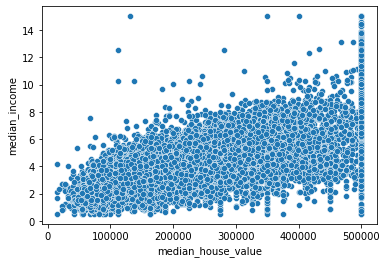

In [4]:
sns.scatterplot(data = house_df, x = 'median_house_value', y = 'median_income')

In [5]:
house_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

How do you perform correlation for all attributes in the dataset?

In [6]:
house_df.corr(method='pearson')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


---
> Your turn:
> Find a strong correlation in the above that you would like to vizualize

---

<AxesSubplot:xlabel='total_bedrooms', ylabel='households'>

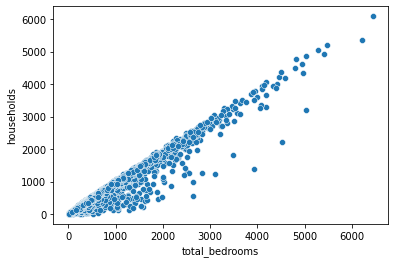

In [7]:
sns.scatterplot(data = house_df, x = 'total_bedrooms', y = 'households')

##### Almost similar - using matplotlib plt function:

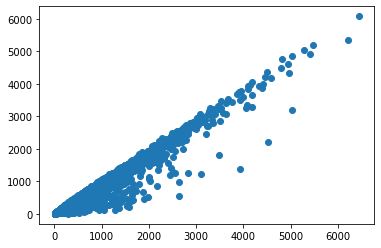

In [8]:
import matplotlib.pyplot as plt 
plt.scatter(house_df['total_bedrooms'], house_df['households'])

##### adding a regression line:

<AxesSubplot:xlabel='total_bedrooms', ylabel='households'>

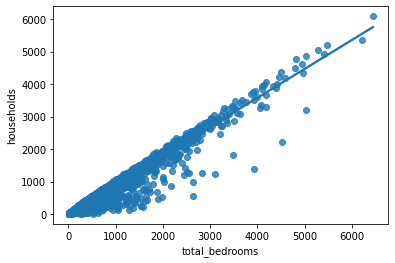

In [9]:
sns.regplot(data=house_df, x='total_bedrooms', y='households')

#### Scatterplots work when there are missing data

In [ ]:
x = pd.Series(range(10, 20))
y = pd.Series([2, 1, 3, np.nan, 8, 3, 18, 25])
example_df = pd.DataFrame({'x': x, 'y': y})
example_df

note that we're abot to use another method - panda's scatterplot

In [ ]:
example_df.plot.scatter(x = 'x', y = 'y')

In [ ]:
example_df.corr(method='pearson') 

In [ ]:
example_df.corr(method='spearman') 

In [ ]:
example_df.corr(method='kendall') 

<a id='section2'></a>

### 2. Scatterplot matrix

The diagonal shows the distribution of the three numeric variables.

In the other cells of the plot matrix, we have the scatterplots of each variable combination in the dataframe. 

In [ ]:
features = ['median_house_value', 'housing_median_age',
            'median_income']
pd.plotting.scatter_matrix(house_df[features])

In [ ]:
#sns.set()
sns.pairplot(house_df[features], height = 2.5)

<a id='section3'></a>

Remember our Dino data?

In [ ]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/DatasaurusDozen.tsv'

In [ ]:
dino = pd.read_csv(url, sep='\t')

In [ ]:
dino.head()

Add a regression line:

In [ ]:
grid_scatterplots = sns.FacetGrid(dino, col="dataset", hue="dataset", col_wrap=4)
grid_scatterplots.map_dataframe(sns.regplot, x="x", y="y")

Try the different correlation options - is there a difference?

In [ ]:
#dino.groupby('dataset').corr(method = 'pearson')
#dino.groupby('dataset').corr(method = 'spearman')
dino.groupby('dataset').corr(method = 'kendall')

### 3. Heatmaps

##### Pandas doesn't contain a built-in heatmap function. We can try and create one by adding color to corr:

In [ ]:
correlation_matrix = house_df[features].corr()
correlation_matrix
correlation_matrix.style.background_gradient(cmap='coolwarm')

In [ ]:
correlation_matrix.style.background_gradient(cmap='Blues')

##### Or we can use seaborn

In [ ]:
features = ['median_house_value', 'housing_median_age','median_income','total_bedrooms','population']

In [ ]:
correlation_matrix = house_df[features].corr().round(2)
correlation_matrix

In [ ]:
sns.heatmap(data=correlation_matrix,cmap='Greens', annot=True)

---
> ##### Summary
>
>* `.corr` - compute pairwise correlation of columns, excluding NA/null values. [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)
>
>* `.corr.style.background_gradient` - change the background color. [various options](corr.style.background_gradient)
>
>* `.plotting.scatter_matrix` - draw a matrix of scatter plots. [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html?highlight=scatter_matrix)
>
>* `.plot.scatter` - plot a scatter plot
>
> Seaborn package:
>
>* `sns.scatterplot` - a scatter plot
>
>* `sns.regplot` - a scatter plot with a regression line
>
>* `sns.pairplot` - scatter plot matrix
>
> * `sns.heatmap` - a heatmap. @annot = True to print the values inside the square
>
---

## 4. Long vs. wide formats

Some data comes from surveys. This is an example of a survey on fitness

In [27]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/fitness_analysis.csv'
fit_df = pd.read_csv(url)
fit_df.head(2)

,Timestamp,Your name,Your gender,Your age,How important is exercise to you ?,How do you describe your current level of fitness ?,How often do you exercise?,"What barriers, if any, prevent you from exercising more regularly? (Please select all that apply)",What form(s) of exercise do you currently participate in ? (Please select all that apply),Do you exercise ___________ ?,What time if the day do you prefer to exercise?,How long do you spend exercising per day ?,Would you say you eat a healthy balanced diet ?,"What prevents you from eating a healthy balanced diet, If any? (Please select all that apply)",How healthy do you consider yourself?,Have you ever recommended your friends to follow a fitness routine?,Have you ever purchased a fitness equipment?,What motivates you to exercise? (Please select all that applies )
0,2019/07/03 11:48:07 PM GMT+5:30,Parkavi,Female,19 to 25,2,Good,Never,I don't have enough time;I can't stay motivated,I don't really exercise,I don't really exercise,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,3,Yes,No,I'm sorry ... I'm not really interested in exe...
1,2019/07/03 11:51:22 PM GMT+5:30,Nithilaa,Female,19 to 25,4,Very good,Never,I don't have enough time;I'll become too tired,Walking or jogging;Swimming,With a group,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit;I want to be flexible;I want ...


In [28]:
fit_df.shape

(545, 18)

The column names are too long. 

Rename some of the columns. 

In [29]:
fit_df = fit_df.rename(columns={'How do you describe your current level of fitness ?': 'fitness_level', 'What form(s) of exercise do you currently participate in ?                        (Please select all that apply)': 'exercise'})

In [30]:
fit_df[['exercise', 'fitness_level']]

,exercise,fitness_level
0,I don't really exercise,Good
1,Walking or jogging;Swimming,Very good
2,Walking or jogging,Good
3,Walking or jogging;Gym;Lifting weights,Good
4,I don't really exercise,Unfit
...,...,...
540,Walking or jogging,Perfect
541,Walking or jogging;Gym;Swimming,Average
542,Walking or jogging;Yoga,Average
543,Walking or jogging,Good


Split the exercise column according to ';'

n indicates how many splits to perform

In [31]:
list_exs = fit_df["exercise"].str.split(";", n = 6, expand = True)
list_exs

,0,1,2,3,4,5,6
0,I don't really exercise,None,None,None,None,None,None
1,Walking or jogging,Swimming,None,None,None,None,None
2,Walking or jogging,None,None,None,None,None,None
3,Walking or jogging,Gym,Lifting weights,None,None,None,None
4,I don't really exercise,None,None,None,None,None,None
...,...,...,...,...,...,...,...
540,Walking or jogging,None,None,None,None,None,None
541,Walking or jogging,Gym,Swimming,None,None,None,None
542,Walking or jogging,Yoga,None,None,None,None,None
543,Walking or jogging,None,None,None,None,None,None


Do we need more splits? 

Also - note that the columns are numbered, like the rows. No column names.

In [32]:
fit_df.exercise.str.count(';').max()

6

In [33]:
list_exs[6].unique()

array([None, 'Team sport'], dtype=object)

Add these new columns with the exercises to the dataframe

In [34]:
fit_df["choice1"]= list_exs[0]
fit_df["choice2"]= list_exs[1]
fit_df["choice3"]= list_exs[2]
fit_df["choice4"]= list_exs[3]

In [35]:
fit_df.head(2)

,Timestamp,Your name,Your gender,Your age,How important is exercise to you ?,fitness_level,How often do you exercise?,"What barriers, if any, prevent you from exercising more regularly? (Please select all that apply)",exercise,Do you exercise ___________ ?,...,Would you say you eat a healthy balanced diet ?,"What prevents you from eating a healthy balanced diet, If any? (Please select all that apply)",How healthy do you consider yourself?,Have you ever recommended your friends to follow a fitness routine?,Have you ever purchased a fitness equipment?,What motivates you to exercise? (Please select all that applies ),choice1,choice2,choice3,choice4
0,2019/07/03 11:48:07 PM GMT+5:30,Parkavi,Female,19 to 25,2,Good,Never,I don't have enough time;I can't stay motivated,I don't really exercise,I don't really exercise,...,Not always,Ease of access to fast food;Temptation and cra...,3,Yes,No,I'm sorry ... I'm not really interested in exe...,I don't really exercise,None,None,None
1,2019/07/03 11:51:22 PM GMT+5:30,Nithilaa,Female,19 to 25,4,Very good,Never,I don't have enough time;I'll become too tired,Walking or jogging;Swimming,With a group,...,Not always,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit;I want to be flexible;I want ...,Walking or jogging,Swimming,None,None


This dataframe doesn't have an id. lets add one.

In [36]:
fit_df["id"] = fit_df.index + 1

We now want to view some stats on the diffent exercise. But the data is in wide format.

Wide format: each row has one `key`: one person, one occurance

Long format: each row has more than one `key`: one person per date, one occurance per person, one person per date per site

### Long format

Lets unite exercise1, exercise2 and exercise 3 into one column. 

We use 'melt'. We melt according to the id (this is why we added an id)



This is in wide format:

In [37]:
fit_df[['id','fitness_level','choice1','choice2', 'choice3', 'choice4']]

,id,fitness_level,choice1,choice2,choice3,choice4
0,1,Good,I don't really exercise,None,None,None
1,2,Very good,Walking or jogging,Swimming,None,None
2,3,Good,Walking or jogging,None,None,None
3,4,Good,Walking or jogging,Gym,Lifting weights,None
4,5,Unfit,I don't really exercise,None,None,None
...,...,...,...,...,...,...
540,541,Perfect,Walking or jogging,None,None,None
541,542,Average,Walking or jogging,Gym,Swimming,None
542,543,Average,Walking or jogging,Yoga,None,None
543,544,Good,Walking or jogging,None,None,None


This is in long format:

In [38]:
melted_df = pd.melt(fit_df, id_vars=['id','fitness_level'], value_vars=['choice1','choice2', 'choice3', 'choice4'])
melted_df

,id,fitness_level,variable,value
0,1,Good,choice1,I don't really exercise
1,2,Very good,choice1,Walking or jogging
2,3,Good,choice1,Walking or jogging
3,4,Good,choice1,Walking or jogging
4,5,Unfit,choice1,I don't really exercise
...,...,...,...,...
2175,541,Perfect,choice4,None
2176,542,Average,choice4,None
2177,543,Average,choice4,None
2178,544,Good,choice4,None


Rename columns:

In [39]:
melted_df = melted_df.rename(columns={'variable':'choice','value':'exercise'})
melted_df

,id,fitness_level,choice,exercise
0,1,Good,choice1,I don't really exercise
1,2,Very good,choice1,Walking or jogging
2,3,Good,choice1,Walking or jogging
3,4,Good,choice1,Walking or jogging
4,5,Unfit,choice1,I don't really exercise
...,...,...,...,...
2175,541,Perfect,choice4,None
2176,542,Average,choice4,None
2177,543,Average,choice4,None
2178,544,Good,choice4,None


Each id appears a few times (how many times?)

In [40]:
melted_df.loc[melted_df['id']== 4]

,id,fitness_level,choice,exercise
3,4,Good,choice1,Walking or jogging
548,4,Good,choice2,Gym
1093,4,Good,choice3,Lifting weights
1638,4,Good,choice4,None


finally.. we can look at the categories

In [41]:
melted_df['exercise'].unique()

array(["I don't really exercise", 'Walking or jogging', 'Gym',
       'Team sport', 'Zumba dance', 'Yoga', 'Swimming', 'Lifting weights',
       None], dtype=object)

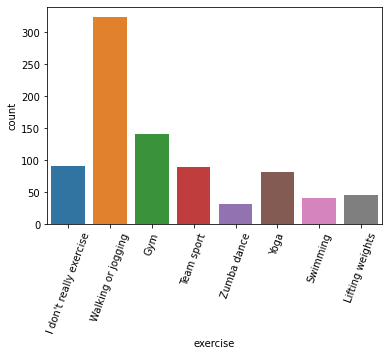

In [42]:
sns.countplot(data = melted_df, x = 'exercise')
plt.xticks(rotation=70)
plt.show()

Now lets look at the fitness level:

In [43]:
melted_df['fitness_level'].unique()

array(['Good', 'Very good', 'Unfit', 'Average', 'Perfect'], dtype=object)

In [44]:
melted_df['fitness_level'].replace({'Unfit' : 1, 'Average' : 2, 'Good' : 3, 'Very good' : 4, 'Perfect' : 5}, inplace = True)
melted_df.head()

,id,fitness_level,choice,exercise
0,1,3,choice1,I don't really exercise
1,2,4,choice1,Walking or jogging
2,3,3,choice1,Walking or jogging
3,4,3,choice1,Walking or jogging
4,5,1,choice1,I don't really exercise


In [45]:
melted_df['fitness_level'] = melted_df['fitness_level'].astype('int64')

In [46]:
group_df = melted_df.groupby('exercise')[['fitness_level']].mean()
group_df

,fitness_level
exercise,
Gym,2.864286
I don't really exercise,2.033333
Lifting weights,3.111111
Swimming,2.926829
Team sport,3.056180
Walking or jogging,2.709877
Yoga,2.728395
Zumba dance,2.645161


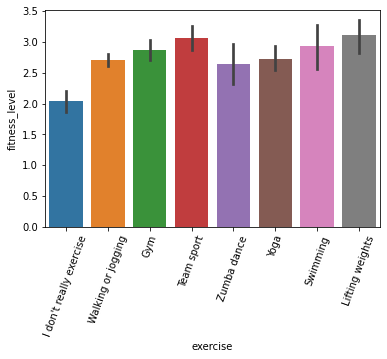

In [47]:
sns.barplot(data = melted_df, x='exercise', y='fitness_level')
plt.xticks(rotation=70)
plt.show()

<AxesSubplot:xlabel='fitness_level', ylabel='Percent'>

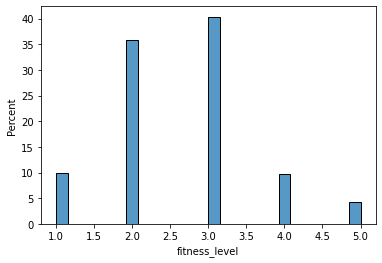

In [48]:
sns.histplot(data = melted_df, x = 'fitness_level', stat = 'percent')

Plot on a FacetGrid. The column is different facets to plot

Use map_dataframe to create the plot. 

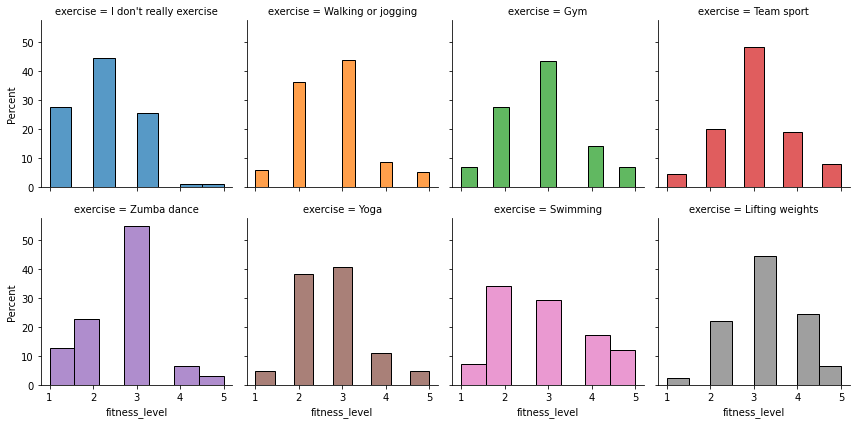

In [49]:
g = sns.FacetGrid(data = melted_df, col="exercise", hue="exercise", col_wrap=4)
g.map_dataframe(sns.histplot, x = 'fitness_level', stat='percent')
plt.show()

---
> ##### Summary
>
>* `.rename` - alter axes (columns or rows) labels
>
>* `str.split(";", n = 6, expand = True)` - split strings around given separator/delimiter. When expand=True, expand the split stirngs to seperate columns
>
>* `pd.melt` - long format where one or more columns are identifier variables (id_vars), while all other columns, considered measured variables (value_vars), are “unpivoted” to the row axis, leaving just two non-identifier columns, ‘variable’ and ‘value’
>
>* `replace` - replace values
>
> * `sns.barplot` - shows mean and confidence intervals 
>
>* `sns.scatterplot` - a scatter plot
>
>* `plt.xticks(rotation=70)` - rotate the labels on the x-axis of a plot
>
>* `sns.FacetGrid` - show different aspects (Facets) of the data, on a grid
>
>* `map_datframe` - plots a function on the grid
---